#Demographic filtering

## KNN Algorithm

Dataset Head:
     Age Group  Gender                Country  ﻿  \
0  18-30 years    Male              Sri Lanka  0   
1    51+ years  Female             USA/Canada  1   
2    51+ years  Female            Middle East  2   
3    51+ years  Female             USA/Canada  3   
4    51+ years  Female  Australia/New Zealand  4   

   Preferred Destination Category  
0         Beaches & Coastal Areas  
1               Nature & Wildlife  
2  Adventure & Unique Experiences  
3  Adventure & Unique Experiences  
4               Nature & Wildlife  

Missing Values:
Age Group                         0
Gender                            0
Country                           0
﻿                                 0
Preferred Destination Category    0
dtype: int64

Accuracy: 0.4323125

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      5047
           1       0.39      0.37      0.38      3703
           2       0.30      0.22     

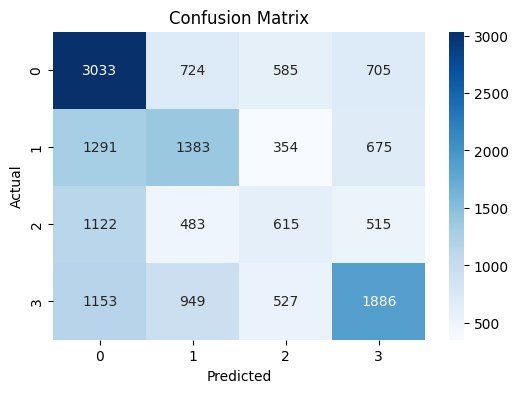

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dataset_path = "/content/drive/MyDrive/FYP_Datasets/demographic_filter_data.csv"

df = pd.read_csv(dataset_path, sep=';')

# Display basic info
print("Dataset Head:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # Optionally, use df.fillna(method="ffill") for forward filling

# Convert categorical features to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop(columns=['Preferred Destination Category'])  # Replace with actual target column
y = df['Preferred Destination Category']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=4)  # You can tune k
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## K means

Dataset Preview:


,Age Group,Gender,Country,﻿,Preferred Destination Category
0,0,1,5,0,1
1,2,0,6,1,3
2,2,0,4,2,0
3,2,0,6,3,0
4,2,0,0,4,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age Group                       80000 non-null  int64
 1   Gender                          80000 non-null  int64
 2   Country                         80000 non-null  int64
 3   ﻿                               80000 non-null  int64
 4   Preferred Destination Category  80000 non-null  int64
dtypes: int64(5)
memory usage: 3.1 MB


None


Missing Values:
 Age Group                         0
Gender                            0
Country                           0
﻿                                 0
Preferred Destination Category    0
dtype: int64
Adjusted Rand Index (ARI): 0.02821907891087248


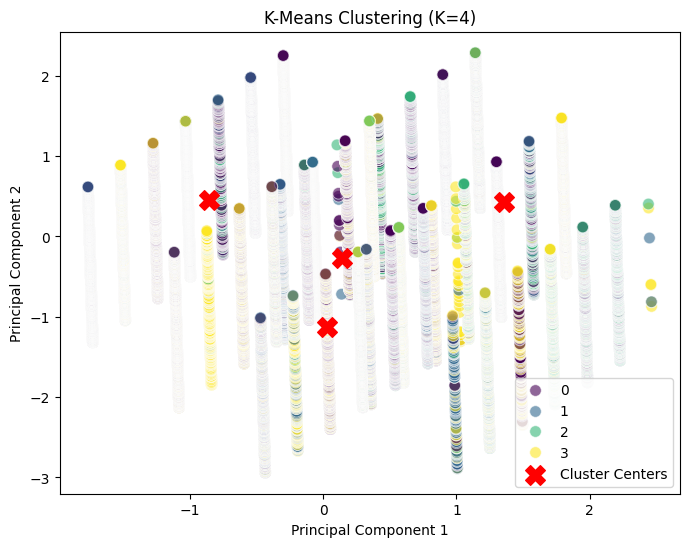


Accuracy: 0.2240625

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.22      0.26      5047
           1       0.34      0.26      0.29      3703
           2       0.13      0.30      0.18      2735
           3       0.20      0.16      0.17      4515

    accuracy                           0.22     16000
   macro avg       0.25      0.23      0.23     16000
weighted avg       0.26      0.22      0.23     16000



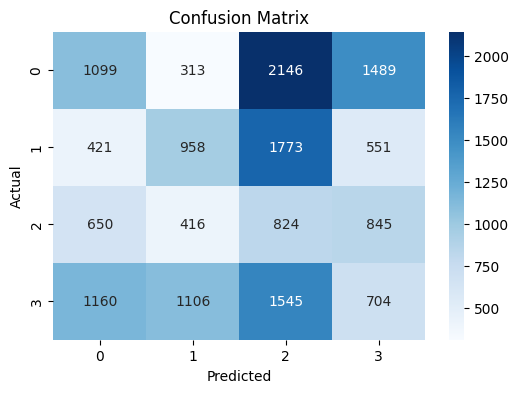

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display dataset preview
print("Dataset Preview:")
display(df.head())
display(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  # Alternatively, use df.fillna(value) if required

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

"""
# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
"""

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Preferred Destination Category'], test_size=0.2, random_state=42)

# Apply K-Means to the training data
K_optimal = 4  # Change based on elbow method result
kmeans = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
kmeans.fit(X_train) # Fit KMeans only on training data

# Predict clusters for training and testing data
train_cluster_labels = kmeans.predict(X_train)
y_pred = kmeans.predict(X_test)


# Example evaluation for clustering using Adjusted Rand Index (ARI)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_test, y_pred)
print(f"Adjusted Rand Index (ARI): {ari}")


# Visualization with PCA (using training data for cluster centers)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # Fit PCA on all data for consistent visualization
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
cluster_centers_pca = pca.transform(kmeans.cluster_centers_) # Transform cluster centers to PCA space

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Preferred Destination Category'], palette="viridis", s=70, alpha=0.6)
plt.scatter(x=cluster_centers_pca[:, 0], y=cluster_centers_pca[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering (K={K_optimal})")
plt.legend()
plt.show()

# ... (Rest of the code) ...
# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

"""
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['Preferred Destination Category'], df['Cluster'])
print("Adjusted Rand Index (ARI):", ari)

from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(df['Preferred Destination Category'], df['Cluster'])
print("Normalized Mutual Information (NMI):", nmi)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
print("Inertia (Within-Cluster Sum of Squares):", kmeans.inertia_)

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df['Cluster'])
print("Davies-Bouldin Score:", db_score)

"""

df = df.drop(columns=['PCA1', 'PCA2'])

## Support Vector Machine

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,log_loss,roc_auc_score

dataset_path = r"D:\UOM\L4S1\FYP\Datasets\demographic_filter_data.csv"

df = pd.read_csv(dataset_path, sep=';')

print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  

# Manually apply label encoding to Preferred Destination Category column
category_values = df['Preferred Destination Category'].unique()
category_mapping = {cat: idx for idx, cat in enumerate(category_values)}
df['Preferred Destination Category'] = df['Preferred Destination Category'].map(category_mapping)

# Ordinal encoding for Age group
age_order = ['18-30 years', '31-50 years', '51+ years']
if 'Age Group' in df.columns:
    df['Age Group'] = df['Age Group'].astype(pd.CategoricalDtype(categories=age_order, ordered=True)).cat.codes
    
# Manual one-hot encoding for Gender and Country columns
for col in ['Gender', 'Country']:
    unique_values = df[col].unique()
    for val in unique_values:
        df[f"{col}_{val}"] = (df[col] == val).astype(int)
    df.drop(columns=[col], inplace=True)

display(df.head())

# Separate features and target
X = df.drop(columns=['Preferred Destination Category']) 
y = df['Preferred Destination Category']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dataset Preview:


,Age Group,Gender,Country,Preferred Destination Category
0,18-30 years,Male,Sri Lanka,Beaches & Coastal Areas
1,51+ years,Female,USA/Canada,Nature & Wildlife
2,51+ years,Female,Middle East,Adventure & Unique Experiences
3,51+ years,Female,USA/Canada,Adventure & Unique Experiences
4,51+ years,Female,Australia/New Zealand,Nature & Wildlife



Missing Values:
 Age Group                         0
Gender                            0
Country                           0
Preferred Destination Category    0
dtype: int64


,Age Group,Preferred Destination Category,Gender_Male,Gender_Female,Country_Sri Lanka,Country_USA/Canada,Country_Middle East,Country_Australia/New Zealand,"Country_East Asia (China, Japan, Korea, etc.)",Country_India,Country_Europe
0,0,0,1,0,1,0,0,0,0,0,0
1,2,1,0,1,0,1,0,0,0,0,0
2,2,2,0,1,0,0,1,0,0,0,0
3,2,2,0,1,0,1,0,0,0,0,0
4,2,1,0,1,0,0,0,1,0,0,0


In [16]:
# Train Support Vector Machine (SVM) model
model = SVC(kernel='rbf', C=20.0, gamma='auto', probability=True)  # Enable probability estimates
model.fit(X_train, y_train)

SVC(C=20.0, gamma='auto', probability=True)

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Predict probabilities
y_prob = model.predict_proba(X_test)

In [20]:
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

Log Loss: 1.1638


In [ ]:
y_test_bin = label_binarize(y_test, classes=range(10)) 

# Compute macro-averaged AUC
auc_score = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print(f"Macro-Averaged AUC Score: {auc_score:.4f}")

Macro-Averaged AUC Score: 0.7388



Model Accuracy: 0.4985

Classification Report:
                                 precision    recall  f1-score   support

       Beaches & Coastal Areas       0.48      0.42      0.45      3703
             Nature & Wildlife       0.52      0.59      0.55      4515
Adventure & Unique Experiences       0.51      0.62      0.56      5047
   Historical & Cultural Sites       0.44      0.23      0.30      2735

                      accuracy                           0.50     16000
                     macro avg       0.49      0.46      0.46     16000
                  weighted avg       0.49      0.50      0.49     16000


Confusion Matrix:
 [[1567  790 1247   99]
 [ 946 2659  594  316]
 [ 402 1135 3124  386]
 [ 362  531 1216  626]]


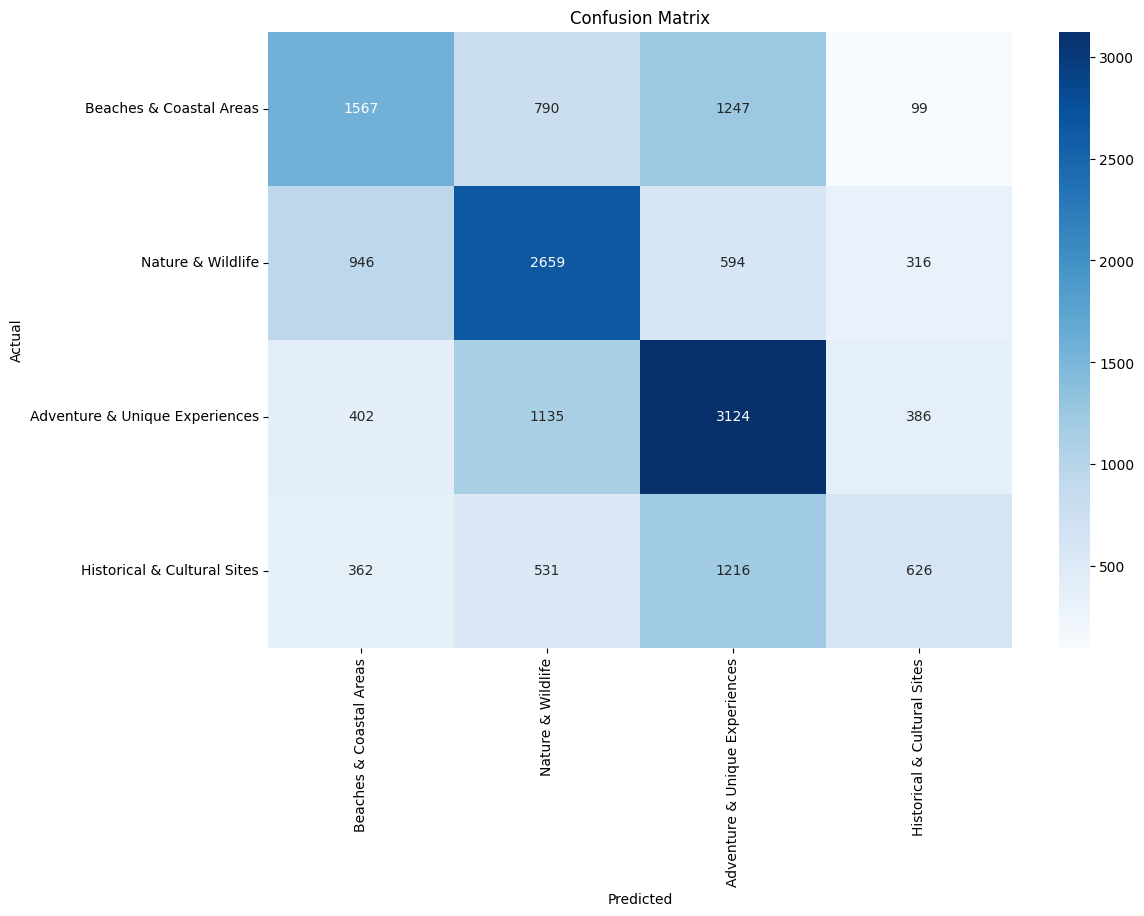

In [27]:
# Evaluate using encoded values
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=category_values))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing confusion matrix with class names as ticks
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=category_values, yticklabels=category_values)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


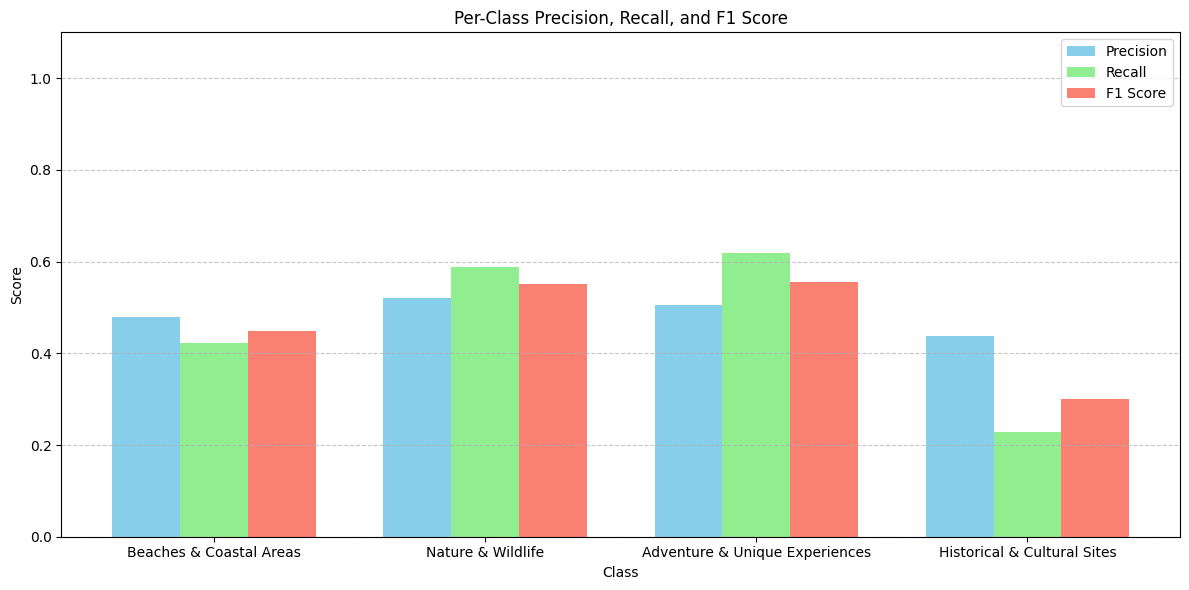

In [31]:
from sklearn.metrics import precision_recall_fscore_support

# Get per-class precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(y))

# Class labels
classes = np.unique(y)

# Bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='skyblue')
plt.bar(x, recall, width=bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1, width=bar_width, label='F1 Score', color='salmon')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Per-Class Precision, Recall, and F1 Score')
plt.xticks(ticks=x, labels=category_values)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [55]:
for col, le in label_encoders.items():
    if hasattr(le, 'classes_'):
        print(f"Column: {col}")
        for idx, cls in enumerate(le.classes_):
            print(f"  {idx}: {cls}")
        print()

Column: Age Group
  0: 18-30 years
  1: 31-50 years
  2: 51+ years

Column: Gender
  0: Female
  1: Male

Column: Country
  0: Australia/New Zealand
  1: East Asia (China, Japan, Korea, etc.)
  2: Europe
  3: India
  4: Middle East
  5: Sri Lanka
  6: USA/Canada

Column: Preferred Destination Category
  0: Adventure & Unique Experiences
  1: Beaches & Coastal Areas
  2: Historical & Cultural Sites
  3: Nature & Wildlife



In [27]:
import numpy as np

# Randomly select one record from the dataset
random_idx = np.random.randint(0, len(df))
sample = df.iloc[random_idx]

# Extract features (excluding the target/last column)
sample_features = sample.iloc[:-1].values # Reshape for single sample

# Standardize the features using the existing scaler
sample_scaled = scaler.transform(np.asarray(sample_features).reshape(1, -1))

# Predict the category using the trained model
predicted_category = model.predict(sample_scaled)[0]

print(f"Selected record index: {random_idx}")
print("Sample features:", sample[X.columns].to_dict())
print("Actual category:", sample['Preferred Destination Category'])
print("Predicted category:", predicted_category)

c:\Users\Anuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but StandardScaler is expecting 3 features as input.

#Content based & Collaborative filtering

In [32]:
dataset_path = r"D:\UOM\L4S1\FYP\Datasets\content_and_collaborative_filter_data.csv"

df = pd.read_csv(dataset_path, sep=';')

In [33]:
df

,Travel Group,Budget,Accommodation,Traveler Type,Activity Interest,Physical Activity Level,Experience Level,Preferred Destination Category
0,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Luxury & relaxation traveler,Spiritual & religious visits,Less active,Have traveled occasionally,Beaches & Coastal Areas
1,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Photography & scenic views seeker,Hiking & trekking,Less active,First-time traveler,Nature & Wildlife
2,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Food & culinary explorer,Surfing & water sports,Moderately active,First-time traveler,Adventure & Unique Experiences
3,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Business traveler,Hiking & trekking,Less active,First-time traveler,Adventure & Unique Experiences
4,Traveling with extended family (multi-generati...,Mid-range,Budget hotels & Airbnb,Photography & scenic views seeker,Wildlife safaris,Moderately active,First-time traveler,Nature & Wildlife
...,...,...,...,...,...,...,...,...
79995,Traveling with extended family (multi-generati...,Mid-range,Budget hotels & Airbnb,Nature & wildlife lover,Hiking & trekking,Less active,First-time traveler,Nature & Wildlife
79996,Traveling with teenagers (12-18),Luxury,3 - 4 star hotels,Business traveler,Spiritual & religious visits,Moderately active,First-time traveler,Adventure & Unique Experiences
79997,Traveling with young kids (under 12),Luxury,3 - 4 star hotels,Spiritual & religious traveler,Food tours & local cuisine experiences,Very active,First-time traveler,Historical & Cultural Sites
79998,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Nature & wildlife lover,Historical & cultural sightseeing,Moderately active,Frequent traveler,Nature & Wildlife


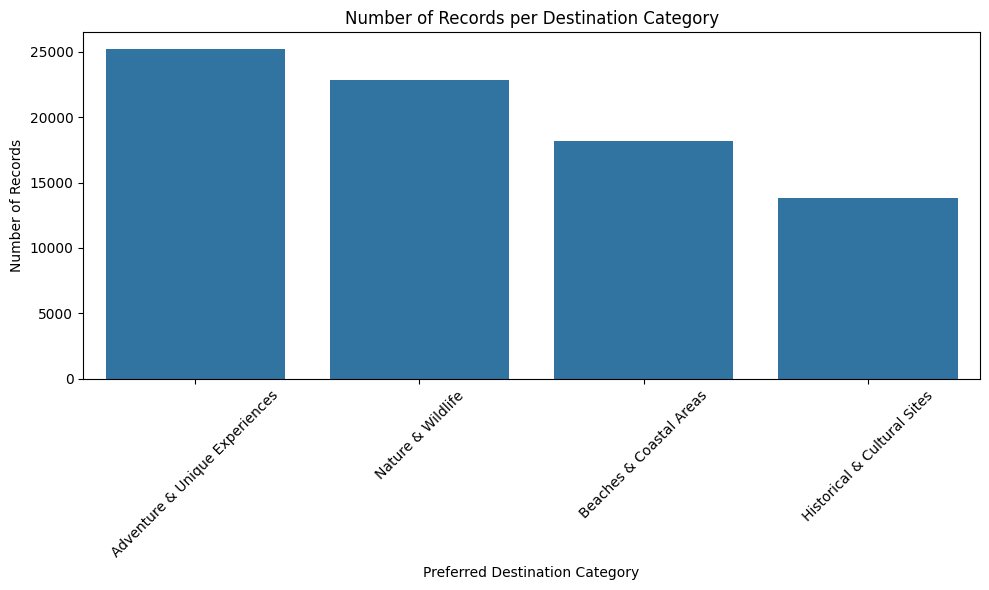

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferred Destination Category', order=df['Preferred Destination Category'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Preferred Destination Category')
plt.ylabel('Number of Records')
plt.title('Number of Records per Destination Category')
plt.tight_layout()
plt.show()

In [34]:
df = df.drop(columns=['Traveler Type'])
for col in df.columns:
  print(col)

Travel Group
Budget
Accommodation
Activity Interest
Physical Activity Level
Experience Level
Preferred Destination Category


## Decision Tree

Dataset Preview:


,Travel Group,Budget,Accommodation,Activity Interest,Physical Activity Level,Experience Level,Preferred Destination Category
0,4,0,3,5,0,2,1
1,2,2,0,1,0,0,3
2,2,2,0,6,1,0,0
3,4,0,3,1,0,0,0
4,2,2,2,7,1,0,3



Missing Values:
 Travel Group                      0
Budget                            0
Accommodation                     0
Activity Interest                 0
Physical Activity Level           0
Experience Level                  0
Preferred Destination Category    0
dtype: int64

Model Accuracy: 0.6228435455086259

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      5028
           1       0.54      0.49      0.51      1680
           2       0.48      0.36      0.41      1276
           3       0.60      0.50      0.55      2102

    accuracy                           0.62     10086
   macro avg       0.57      0.53      0.55     10086
weighted avg       0.61      0.62      0.61     10086


Confusion Matrix:
 [[3939  341  234  514]
 [ 637  827  100  116]
 [ 577  156  462   81]
 [ 679  208  161 1054]]





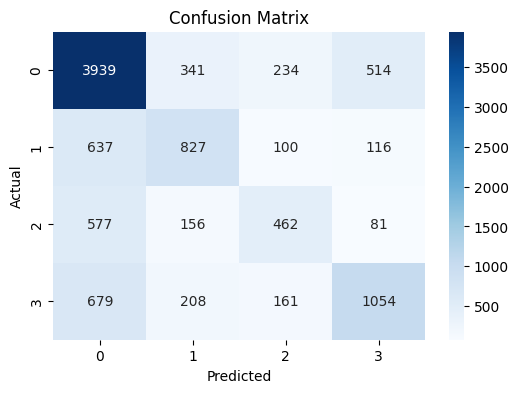

TypeError: can only concatenate str (not "numpy.int64") to str

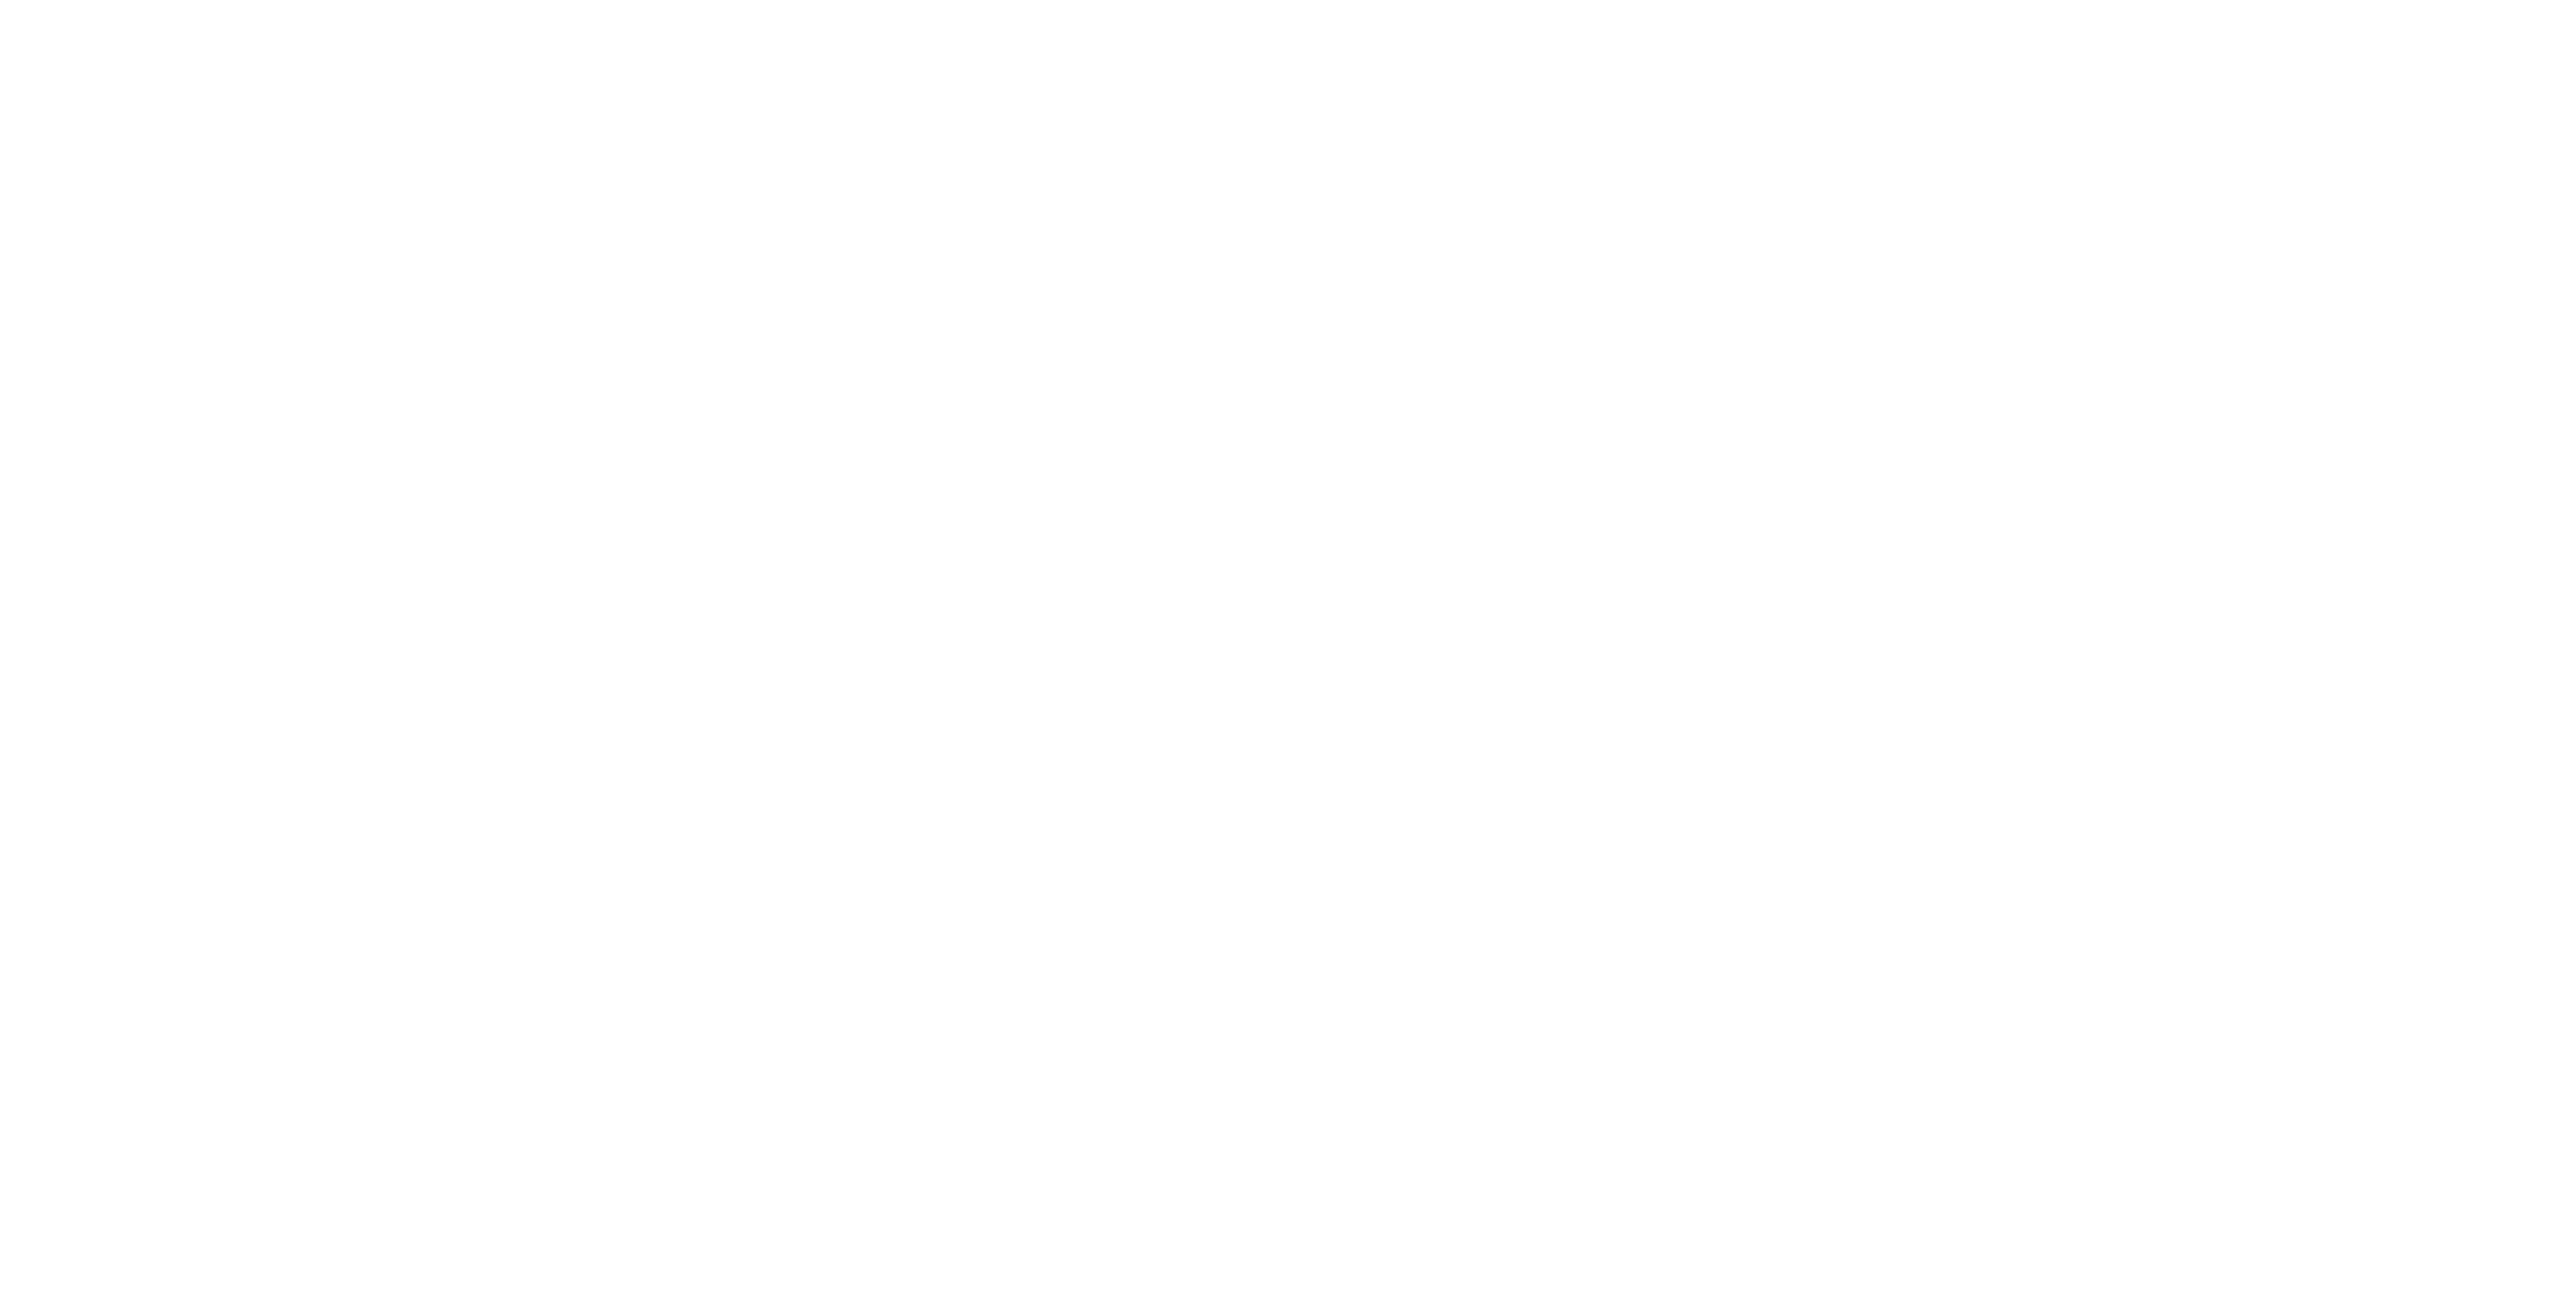

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Display dataset preview
print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  # Alternatively, use df.fillna(value) if required

destination_categories = df['Preferred Destination Category'].unique()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later

# Define features (X) and target variable (y)
X = df.drop(columns=['Preferred Destination Category'])  # Replace 'target' with actual target column name
y = df['Preferred Destination Category']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)  # Change max_depth as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\n\n")

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n\n")
# Visualizing the decision tree
plt.figure(figsize=(36, 18))
plot_tree(model, feature_names=X.columns, class_names=destination_categories, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## Random Forrest Classifier

In [35]:
df.head()

,Travel Group,Budget,Accommodation,Activity Interest,Physical Activity Level,Experience Level,Preferred Destination Category
0,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Spiritual & religious visits,Less active,Have traveled occasionally,Beaches & Coastal Areas
1,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Hiking & trekking,Less active,First-time traveler,Nature & Wildlife
2,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Surfing & water sports,Moderately active,First-time traveler,Adventure & Unique Experiences
3,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Hiking & trekking,Less active,First-time traveler,Adventure & Unique Experiences
4,Traveling with extended family (multi-generati...,Mid-range,Budget hotels & Airbnb,Wildlife safaris,Moderately active,First-time traveler,Nature & Wildlife


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  # Alternatively, use df.fillna(value) if required

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later

Dataset Preview:


,Travel Group,Budget,Accommodation,Activity Interest,Physical Activity Level,Experience Level,Preferred Destination Category
0,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Spiritual & religious visits,Less active,Have traveled occasionally,Beaches & Coastal Areas
1,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Hiking & trekking,Less active,First-time traveler,Nature & Wildlife
2,Traveling with extended family (multi-generati...,Mid-range,3 - 4 star hotels,Surfing & water sports,Moderately active,First-time traveler,Adventure & Unique Experiences
3,Traveling with teenagers (12-18),Budget/Backpacking,Hostels & guesthouses,Hiking & trekking,Less active,First-time traveler,Adventure & Unique Experiences
4,Traveling with extended family (multi-generati...,Mid-range,Budget hotels & Airbnb,Wildlife safaris,Moderately active,First-time traveler,Nature & Wildlife



Missing Values:
 Travel Group                      0
Budget                            0
Accommodation                     0
Activity Interest                 0
Physical Activity Level           0
Experience Level                  0
Preferred Destination Category    0
dtype: int64


In [21]:
from sklearn.utils import resample

# Concatenate features and target
df_balanced = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Separate classes
df_majority = df_balanced[df_balanced['target'] == 0]
df_minority = df_balanced[df_balanced['target'] != 0]

# Find the size of the smaller class
minority_size = len(df_minority)
majority_size = len(df_majority)
sample_size = min(minority_size, majority_size)

# Downsample both classes to the size of the smaller class
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=sample_size,
    random_state=42
)
df_minority_downsampled = resample(
    df_minority,
    replace=False,
    n_samples=sample_size,
    random_state=42
)

# Combine and shuffle
df_balanced = pd.concat([df_majority_downsampled, df_minority_downsampled]).sample(frac=1, random_state=42)
X_balanced = df_balanced.drop('target', axis=1)
y_balanced = df_balanced['target']

In [37]:
# Separate features and target
X = df.drop(columns=['Preferred Destination Category']) 
y = df['Preferred Destination Category']
# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:

# Make predictions
y_pred = model.predict(X_test)

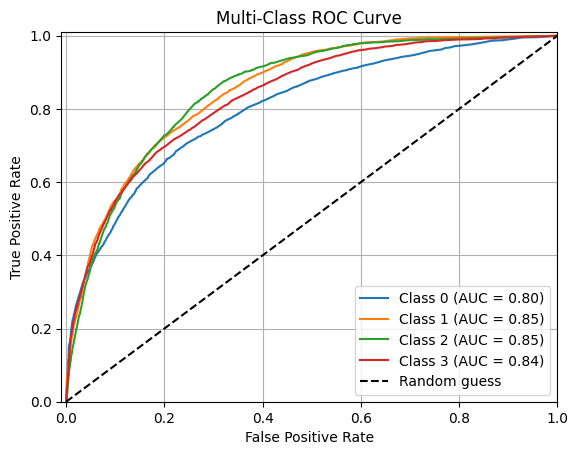

In [41]:
from sklearn.metrics import roc_curve, auc
# Binarize labels (e.g. classes [0,1,2] → 3 binary arrays)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = model.predict_proba(X_test)

plt.figure()
for idx, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, idx], y_prob[:, idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


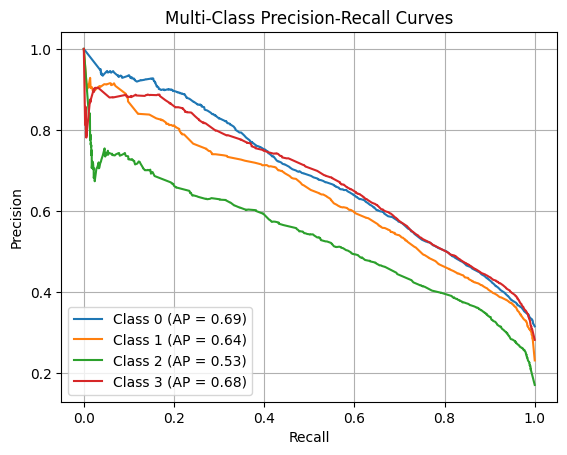

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
avg_prec = dict()

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = model.predict_proba(X_test)

plt.figure()
for idx, cls in enumerate(classes):
    precision[idx], recall[idx], _ = precision_recall_curve(y_test_bin[:, idx], y_prob[:, idx])
    avg_prec[idx] = average_precision_score(y_test_bin[:, idx], y_prob[:, idx])
    plt.plot(recall[idx], precision[idx], label=f'Class {cls} (AP = {avg_prec[idx]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



Model Accuracy: 0.59275

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62      5047
           1       0.59      0.60      0.59      3703
           2       0.52      0.49      0.50      2735
           3       0.63      0.61      0.62      4515

    accuracy                           0.59     16000
   macro avg       0.58      0.58      0.58     16000
weighted avg       0.59      0.59      0.59     16000


Confusion Matrix:
 [[3187  586  472  802]
 [ 754 2206  290  453]
 [ 653  382 1347  353]
 [ 707  573  491 2744]]


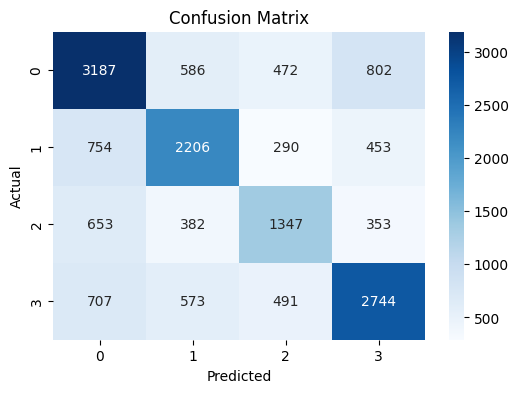

C:\Users\Anuja\AppData\Local\Temp\ipykernel_20888\221670883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


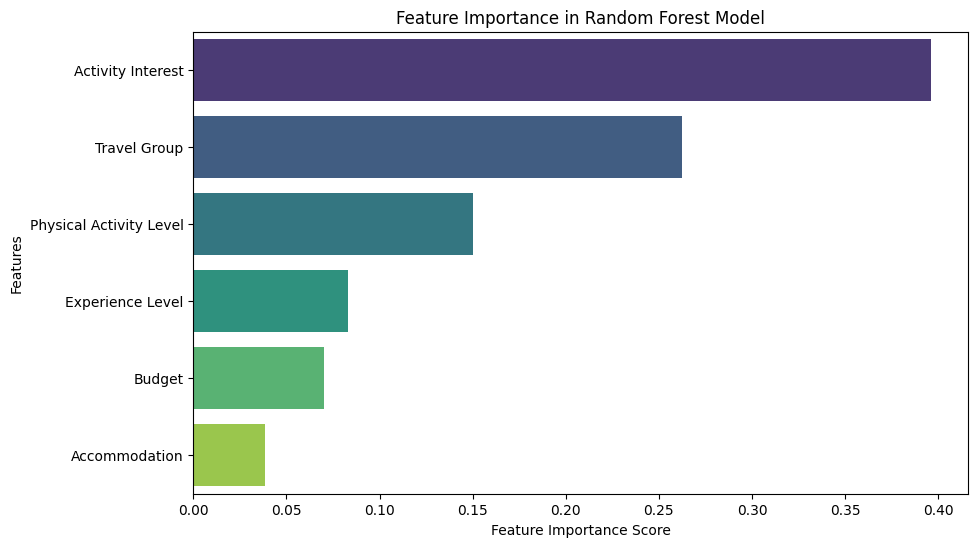

In [46]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


Model Accuracy: 0.59275

Classification Report:
                                 precision    recall  f1-score   support

       Beaches & Coastal Areas       0.60      0.63      0.62      5047
             Nature & Wildlife       0.59      0.60      0.59      3703
Adventure & Unique Experiences       0.52      0.49      0.50      2735
   Historical & Cultural Sites       0.63      0.61      0.62      4515

                      accuracy                           0.59     16000
                     macro avg       0.58      0.58      0.58     16000
                  weighted avg       0.59      0.59      0.59     16000


Confusion Matrix:
 [[3187  586  472  802]
 [ 754 2206  290  453]
 [ 653  382 1347  353]
 [ 707  573  491 2744]]


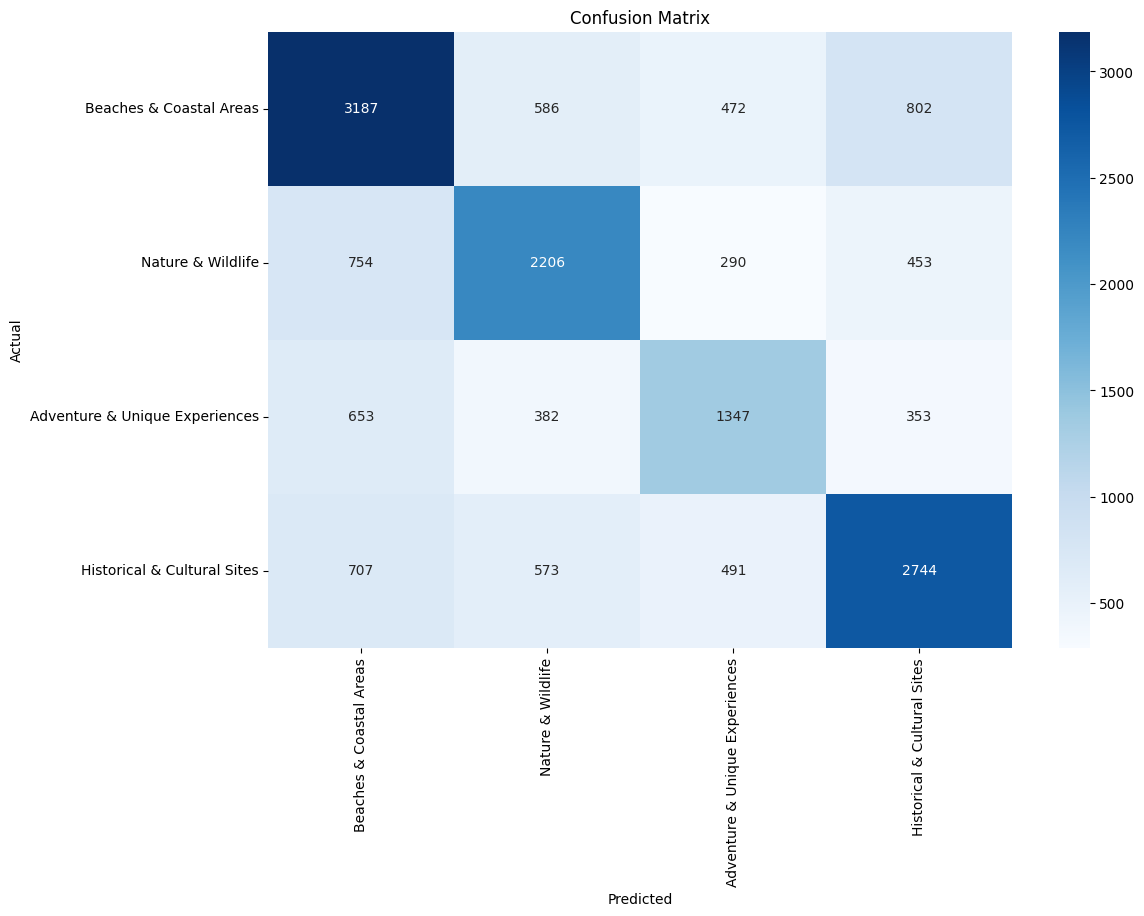

In [45]:
# Evaluate using encoded values
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=category_values))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing confusion matrix with class names as ticks
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=category_values, yticklabels=category_values)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [52]:
for col, le in label_encoders.items():
    if hasattr(le, 'classes_'):
        print(f"Column: {col}")
        for idx, cls in enumerate(le.classes_):
            print(f"  {idx}: {cls}")
        print()

Column: Travel Group
  0: Solo traveler
  1: Traveling with a partner
  2: Traveling with extended family (multi-generational)
  3: Traveling with friends
  4: Traveling with teenagers (12-18)
  5: Traveling with young kids (under 12)

Column: Budget
  0: Budget/Backpacking
  1: Luxury
  2: Mid-range

Column: Accommodation
  0: 3 - 4 star hotels
  1: 5 - star hotels & luxury resorts
  2: Budget hotels & Airbnb
  3: Hostels & guesthouses

Column: Activity Interest
  0: Food tours & local cuisine experiences
  1: Hiking & trekking
  2: Historical & cultural sightseeing
  3: Relaxation & spa retreats
  4: Shopping & city exploration
  5: Spiritual & religious visits
  6: Surfing & water sports
  7: Wildlife safaris

Column: Physical Activity Level
  0: Less active
  1: Moderately active
  2: Very active

Column: Experience Level
  0: First-time traveler
  1: Frequent traveler
  2: Have traveled occasionally

Column: Preferred Destination Category
  0: Adventure & Unique Experiences
  1: B

In [69]:
import numpy as np

# Randomly select one record from the dataset
random_idx = np.random.randint(0, len(df))
sample = df.iloc[random_idx]

# Extract features (excluding the target column)
sample_features = sample[X.columns].values.reshape(1, -1)

# Predict the category using the trained model
predicted_category = model.predict(sample_features)[0]

print(f"Selected record index: {random_idx}")
print("Sample features:", sample[X.columns].to_dict())
print("Actual category:", sample['Preferred Destination Category'])
print("Predicted category:", predicted_category)

Selected record index: 27942
Sample features: {'Travel Group': 3, 'Budget': 0, 'Accommodation': 3, 'Activity Interest': 5, 'Physical Activity Level': 0, 'Experience Level': 0}
Actual category: 1
Predicted category: 1


c:\Users\Anuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Agglomerative Clustering

Dataset Preview:


,Travel Group,Budget,Accommodation,Activity Interest,Physical Activity Level,Experience Level,Preferred Destination Category,Cluster,PCA1,PCA2
0,4,0,3,5,0,2,1,0,-2.444761,-0.421777
1,2,2,0,1,0,0,3,2,1.934771,-0.014780
2,2,2,0,6,1,0,0,2,1.208412,0.084226
3,4,0,3,1,0,0,0,1,-1.596599,-1.038459
4,2,2,2,7,1,0,3,2,-0.044438,-0.074595



Missing Values:
 Travel Group                      0
Budget                            0
Accommodation                     0
Activity Interest                 0
Physical Activity Level           0
Experience Level                  0
Preferred Destination Category    0
Cluster                           0
PCA1                              0
PCA2                              0
dtype: int64


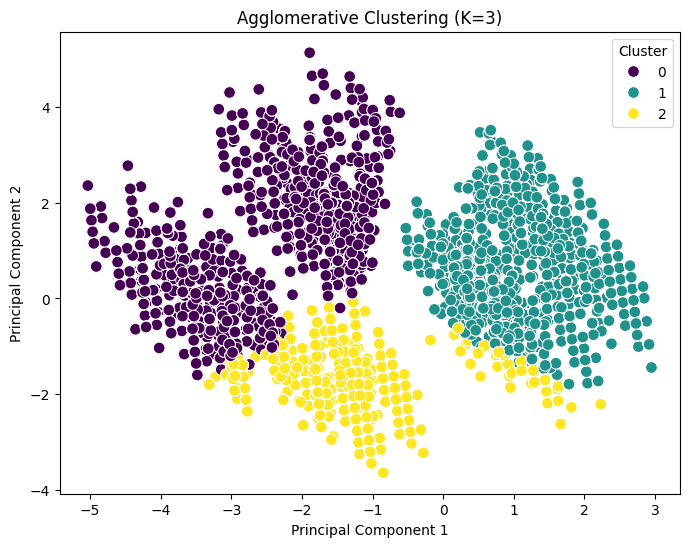

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


# Display dataset preview
print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  # Alternatively, use df.fillna(value) if required

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

"""
# Create a dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X_scaled, method='single')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
"""

# Choose the number of clusters (e.g., from dendrogram, select K=3)
K_optimal = 3  # Change based on dendrogram result
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3, batch_size=500, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette="viridis", s=70)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Agglomerative Clustering (K={K_optimal})")
plt.legend(title="Cluster")
plt.show()

"""
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['Preferred Destination Category'], df['Cluster'])
print("Adjusted Rand Index (ARI):", ari)

from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(df['Preferred Destination Category'], df['Cluster'])
print("Normalized Mutual Information (NMI):", nmi)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
print("Inertia (Within-Cluster Sum of Squares):", kmeans.inertia_)

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df['Cluster'])
print("Davies-Bouldin Score:", db_score)
"""
df = df.drop(columns=['Cluster','PCA1', 'PCA2'])

## NN with One Hot Encoding

In [47]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


# Create user-feature matrix and labels (destinations)
X = df.drop(columns=["Preferred Destination Category"])
y = df["Preferred Destination Category"]

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(y.unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert labels to numerical format
y_train_encoded = y_train.astype('category').cat.codes
y_test_encoded = y_test.astype('category').cat.codes

# Train the model
model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded), verbose=2)

# Model evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Deep Learning Model Accuracy with One-Hot Encoding:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'

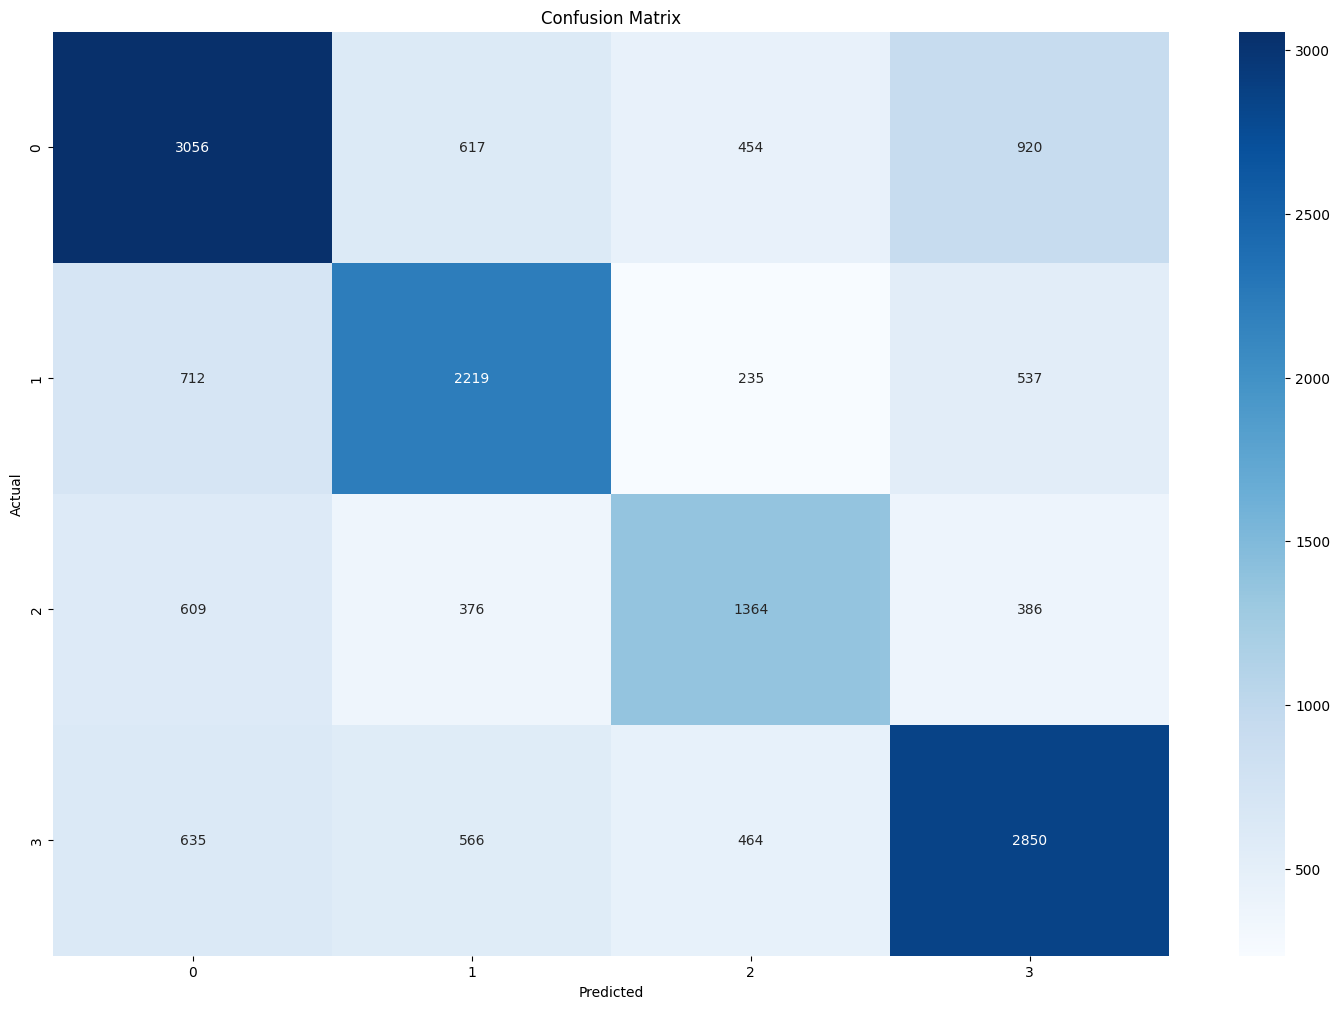

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
plt.figure(figsize=(18, 12))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Knowledge based Filtering

In [ ]:
dataset_path = "/content/drive/MyDrive/FYP_Datasets/attribute_data_destinations.csv"

df = pd.read_csv(dataset_path)

## Logistic regression

Dataset Preview:


,Destination,District,Best_Season,Main_Activity,Budget_Level,Suitable_For,Popularity,Entry_Fee,Climate,Accessibility
0,16,2,4,6,2,2,0,0,3,0
1,6,2,3,2,2,1,1,0,3,1
2,4,11,7,4,0,2,1,1,0,0
3,10,8,0,3,2,6,1,1,5,0
4,18,9,8,2,1,1,1,1,1,1



Missing Values:
 Destination      0
District         0
Best_Season      0
Main_Activity    0
Budget_Level     0
Suitable_For     0
Popularity       0
Entry_Fee        0
Climate          0
Accessibility    0
dtype: int64

Model Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

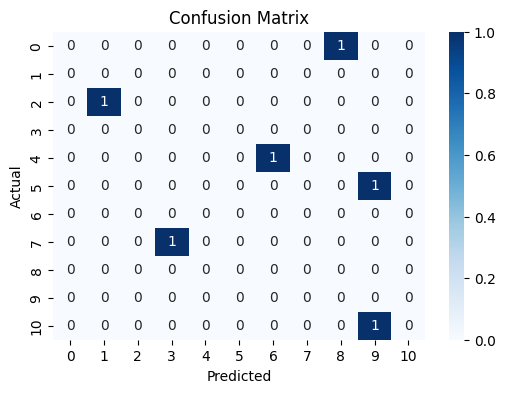

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Display first few rows
print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values if necessary
df.dropna(inplace=True)  # You can also use df.fillna(value) if needed

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later

X = df.drop(columns=['Destination'])  # Replace with actual target column
y = df['Destination']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Naïve Bayes Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Display dataset preview
print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)  # Alternatively, use df.fillna(value) if required

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later

X = df.drop(columns=['Destination'])  # Replace with actual target column
y = df['Destination']
# Split into training and testing data (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes model (Gaussian Naïve Bayes) on the entire dataset
model = GaussianNB()
model.fit(X, y)

# Make predictions
# y_pred = model.predict(X_test)

# Evaluate model - Not applicable when training on the entire dataset for prediction on new data
# accuracy = accuracy_score(y_test, y_pred)
# print("\nModel Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing confusion matrix - Not applicable in this scenario
# plt.figure(figsize=(6, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# Create a new sample DataFrame for prediction
new_sample_data = {
    'District': [2],
    'Best_Season': [4],
    'Main_Activity': [6],
    'Budget_Level': [2],
    'Suitable_For': [2],
    'Popularity': [0],
    'Entry_Fee': [0],
    'Climate': [3],
    'Accessibility': [0]
}
new_sample_df = pd.DataFrame(new_sample_data)

# Apply the same label encoding to the new sample data
for column in new_sample_df.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        le = label_encoders[column]
        new_sample_df[column] = le.transform(new_sample_df[column])


# Predict the destination for the new sample
predicted_destination_encoded = model.predict(new_sample_df)

# Decode the predicted destination back to the original label
# Assuming 'Destination' was also label encoded, you need the inverse transform
# You'll need the label encoder for the 'Destination' column
if 'Destination' in label_encoders:
    destination_le = label_encoders['Destination']
    predicted_destination = destination_le.inverse_transform(predicted_destination_encoded)
    print("\nPredicted Destination for the new sample:", predicted_destination[0])
else:
     # If 'Destination' was not encoded, the prediction is already in the original format
     print("\nPredicted Destination for the new sample:", predicted_destination_encoded[0])

Dataset Preview:


,Destination,District,Best_Season,Main_Activity,Budget_Level,Suitable_For,Popularity,Entry_Fee,Climate,Accessibility
0,Nine Arches Bridge,Badulla,Jan,Sightseeing,Medium,Couples,High,No,Mild,Good
1,Ella Rock,Badulla,Feb,Hiking,Medium,Backpackers,Medium,No,Mild,Moderate
2,Ceylon Tea Trails (Hatton),Nuwara Eliya,Mar,Relaxation,High,Couples,Medium,Yes,Cool,Good
3,Kitulgala,Kegalle,Apr,Rafting,Medium,Youth,Medium,Yes,Wet,Good
4,Pidurangala Rock,Matale,May,Hiking,Low,Backpackers,Medium,Yes,Dry,Moderate



Missing Values:
 Destination      0
District         0
Best_Season      0
Main_Activity    0
Budget_Level     0
Suitable_For     0
Popularity       0
Entry_Fee        0
Climate          0
Accessibility    0
dtype: int64

Predicted Destination for the new sample: Nine Arches Bridge


In [ ]:
dataset_path = "/content/drive/MyDrive/FYP_Datasets/demographic_filter_data.csv"

df = pd.read_csv(dataset_path, sep=';')

In [ ]:
# prompt: find the count of duplicate values in a pandas dataframe

# Count duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows_count}")

# Count duplicate values in a specific column (e.g., 'Preferred Destination Category')
# Replace 'Preferred Destination Category' with the actual column name you want to check
column_name = 'Preferred Destination Category'
if column_name in df.columns:
    duplicate_column_count = df[column_name].duplicated().sum()
    print(f"Number of duplicate values in column '{column_name}': {duplicate_column_count}")
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

# Get the count of each unique value in a column, showing which ones are duplicates
if column_name in df.columns:
    value_counts = df[column_name].value_counts()
    print(f"\nValue counts for column '{column_name}':")
    print(value_counts[value_counts > 1]) # Show values that appear more than once


Number of duplicate rows: 0
Number of duplicate values in column 'Preferred Destination Category': 79996

Value counts for column 'Preferred Destination Category':
Preferred Destination Category
Adventure & Unique Experiences    25214
Nature & Wildlife                 22841
Beaches & Coastal Areas           18137
Historical & Cultural Sites       13808
Name: count, dtype: int64


## Cosine similarity score

In [26]:
import pandas as pd
import numpy as np

# Define mappings and constants
MONTH_MAP = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
             "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}

ACTIVITY_COMPATIBILITY = {
    'Hiking & trekking': ['Hiking', 'Trekking', 'Climbing'],
    'Surfing & water sports': ['Surfing', 'Swimming', 'Snorkeling', 'Whale Watching', 'Boating', 'Rafting'],
    'Wildlife safaris': ['Safari'],
    'Historical & cultural sightseeing': ['Sightseeing', 'Temple Visit'],
    'Relaxation & spa retreats': ['Relaxation'],
    'Spiritual & religious visits': ['Temple Visit'],
    'Food tours & local cuisine experiences': [],
    'Shopping & city exploration': []
}

PHYSICAL_ACTIVITY_MAP = {
    'Sightseeing': 1, 'Hiking': 3, 'Relaxation': 1, 'Rafting': 3, 'Boating': 2,
    'Climbing': 3, 'Safari': 2, 'Trekking': 3, 'Surfing': 2, 'Swimming': 2,
    'Snorkeling': 2, 'Whale Watching': 1, 'Temple Visit': 1
}

USER_BUDGET_MAP = {
    "Budget/Backpacking": "Low",
    "Mid-range": "Medium",
    "Luxury": "High"
}

# Define feature lists
CATEGORIES = ["Adventure & Unique Experiences", "Historical & Cultural Sites",
              "Nature & Wildlife", "Beaches & Coastal Areas"]
ACTIVITIES = ["Sightseeing", "Hiking", "Relaxation", "Rafting", "Boating", "Climbing",
              "Safari", "Trekking", "Surfing", "Swimming", "Snorkeling", "Whale Watching", "Temple Visit"]
BUDGET_LEVELS = ["Low", "Medium", "High"]
AGE_GROUPS = ["18-30 years", "31-50 years", "51+ years"]
GENDERS = ["Male", "Female"]
TRAVEL_GROUPS = ["Traveling with teenagers (12-18)", "Traveling with friends", "Traveling with extended family (multi-generational)", "Traveling with young kids (under 12)", "Traveling with a partner", "Solo traveler"]
ACCOMMODATIONS = ["3 - 4 star hotels", "Budget hotels & Airbnb", "5 - star hotels & luxury resorts", "Hostels & guesthouses"]
TRAVELER_TYPES = ["Food & culinary explorer", "Nature & wildlife lover", "Adventure seeker",
                  "History & culture enthusiast", "Beach & relaxation seeker"]
PHYSICAL_LEVELS = ["Less active", "Moderately active", "Very active"]
SPECIAL_NEEDS = ["Yes", "No"]
EXPERIENCE_LEVELS = ["First-time traveler", "Have traveled occasionally", "Frequent traveler"]

dataset_path = r"D:\UOM\L4S1\FYP\Datasets\dataset_80k.csv"
# Simulated data (replace with actual CSV loading)
SYNTHETIC_DATA = pd.read_csv(dataset_path)

DESTINATION_DATA = pd.read_csv(r"D:\UOM\L4S1\FYP\Datasets\attribute_data_destinations.csv")

# Create destination-to-category mapping
dest_to_category = SYNTHETIC_DATA.groupby('Sample Destination')['Preferred Destination Category'].first().to_dict()

def create_user_vector(user):
    # Season vector (12 months)
    if user['Travel Season'] == "Anytime":
        season_vec = [1] * 12
    elif user['Travel Season'] == "May to September":
        season_vec = [1 if m in [5, 6, 7, 8, 9] else 0 for m in range(1, 13)]
    elif user['Travel Season'] == "December to April":
        season_vec = [1 if m in [12, 1, 2, 3, 4] else 0 for m in range(1, 13)]
    else:
        season_vec = [0] * 12

    # Budget vector
    user_budget = USER_BUDGET_MAP.get(user['Budget'], "Medium")
    budget_vec = [1 if b == user_budget else 0 for b in BUDGET_LEVELS]

    # Category vector
    category_vec = [1 if c == user['Preferred Destination Category'] else 0 for c in CATEGORIES]

    # Activity vector
    compatible_acts = ACTIVITY_COMPATIBILITY.get(user['Activity Interest'], [])
    activity_vec = [1 if a in compatible_acts else 0 for a in ACTIVITIES]

    # Age Group vector
    age_vec = [1 if a == user['Age Group'] else 0 for a in AGE_GROUPS]

    # Gender vector
    gender_vec = [1 if g == user['Gender'] else 0 for g in GENDERS]

    # Travel Group vector
    travel_group_vec = [1 if t == user['Travel Group'] else 0 for t in TRAVEL_GROUPS]

    # Accommodation vector
    accom_vec = [1 if a == user['Accommodation'] else 0 for a in ACCOMMODATIONS]

    # Traveler Type vector (no direct match, included as is)
    traveler_vec = [1 if t == user['Traveler Type'] else 0 for t in TRAVELER_TYPES]

    # Physical Activity Level vector
    phys_map = {"Less active": 1, "Moderately active": 2, "Very active": 3}
    user_phys = phys_map[user['Physical Activity Level']]
    phys_vec = [1 if i + 1 == user_phys else 0 for i in range(3)]

    # Special Needs vector
    special_vec = [1 if s == user['Special Needs'] else 0 for s in SPECIAL_NEEDS]

    # Experience Level vector
    exp_vec = [1 if e == user['Experience Level'] else 0 for e in EXPERIENCE_LEVELS]

    # Combine all vectors (Country is excluded as it doesn't match destinations)
    return np.array(season_vec + budget_vec + category_vec + activity_vec +
                    age_vec + gender_vec + travel_group_vec + accom_vec +
                    traveler_vec + phys_vec + special_vec + exp_vec)

def create_dest_vector(dest, category):
    # Season vector
    month_num = MONTH_MAP.get(dest['Best_Season'], 1)
    season_vec = [1 if m == month_num else 0 for m in range(1, 13)]

    # Budget vector
    budget_vec = [1 if b == dest['Budget_Level'] else 0 for b in BUDGET_LEVELS]

    # Category vector
    category_vec = [1 if c == category else 0 for c in CATEGORIES]

    # Activity vector
    activity_vec = [1 if a == dest['Main_Activity'] else 0 for a in ACTIVITIES]

    # Age Group (not directly available, assume all destinations suit all ages)
    age_vec = [1] * len(AGE_GROUPS)

    # Gender (assume all destinations suit all genders)
    gender_vec = [1] * len(GENDERS)

    # Travel Group (mapped from Suitable_For)
    travel_group_vec = [1 if t == dest['Suitable_For'] else 0 for t in TRAVEL_GROUPS]

    # Accommodation (inferred from Budget_Level)
    budget_to_accom = {"Low": "Budget Hotel/Hostel", "Medium": "Mid-range Hotel", "High": "Luxury Hotel/Resort"}
    dest_accom = budget_to_accom.get(dest['Budget_Level'], "Mid-range Hotel")
    accom_vec = [1 if a == dest_accom else 0 for a in ACCOMMODATIONS]

    # Traveler Type (no direct match, assume neutral)
    traveler_vec = [0] * len(TRAVELER_TYPES)

    # Physical Activity Level (inferred from Main_Activity)
    phys_level = PHYSICAL_ACTIVITY_MAP.get(dest['Main_Activity'], 2)
    phys_vec = [1 if i + 1 == phys_level else 0 for i in range(3)]

    # Special Needs (mapped from Accessibility)
    access_to_needs = {"High": "No", "Moderate": "No", "Low": "Yes"}
    special_vec = [1 if s == access_to_needs.get(dest['Accessibility'], "No") else 0 for s in SPECIAL_NEEDS]

    # Experience Level (not directly available, assume Intermediate)
    exp_vec = [1 if e == "Intermediate" else 0 for e in EXPERIENCE_LEVELS]

    return np.array(season_vec + budget_vec + category_vec + activity_vec +
                    age_vec + gender_vec + travel_group_vec + accom_vec +
                    traveler_vec + phys_vec + special_vec + exp_vec)

def cosine_sim(u, d):
    return np.dot(u, d) / (np.linalg.norm(u) * np.linalg.norm(d))

# Select a user (e.g., first row)
user = SYNTHETIC_DATA.iloc[26].to_dict()
print(user)
user_vec = create_user_vector(user)

# Compute similarities for all destinations
similarities = []
dest_vectors = []
for _, dest in DESTINATION_DATA.iterrows():
    dest_dict = dest.to_dict()
    category = dest_to_category.get(dest_dict['Destination'], "")
    if not category:
        continue
    dest_vec = create_dest_vector(dest_dict, category)
    dest_vectors.append(dest_vec)
    sim = cosine_sim(user_vec, dest_vec)
    similarities.append((dest_dict['Destination'], sim))

# Sort and display top 5
similarities.sort(key=lambda x: x[1], reverse=True)
print("Top 10 recommended destinations:")
for dest, sim in similarities[:10]:
    print(f"{dest}: {sim:.4f}")

{'Unnamed: 0': 26, 'Age Group': '18-30 years', 'Gender': 'Female', 'Travel Group': 'Traveling with young kids (under 12)', 'Country': 'Middle East', 'Budget': 'Budget/Backpacking', 'Accommodation': 'Hostels & guesthouses', 'Traveler Type': 'Spiritual & religious traveler', 'Activity Interest': 'Food tours & local cuisine experiences', 'Physical Activity Level': 'Very active', 'Special Needs': 'No', 'Travel Season': 'December to April', 'Experience Level': 'Have traveled occasionally', 'Preferred Destination Category': 'Historical & Cultural Sites', 'Sample Destination': 'Polonnaruwa'}
Top 10 recommended destinations:
Ambuluwawa Tower: 0.5641
Adam's Peak: 0.4835
Knuckles Mountain Range: 0.4835
Sigiriya: 0.4835
Anuradhapura: 0.4835
Ella Rock: 0.4029
Kitulgala: 0.4029
Pidurangala Rock: 0.4029
Yala National Park: 0.4029
Sinharaja Rainforest: 0.4029


## Select a row

In [5]:
import json
import pandas as pd
dataset_path = r"D:\UOM\L4S1\FYP\Datasets\dataset_80k.csv"

df = pd.read_csv(dataset_path)
user = df.iloc[19065].to_dict()
user_json = json.dumps(user)  # Convert to JSON format if needed
print(user_json)

for col in df.columns:
    print(f"Distinct values in '{col}':")
    #print(json.dumps(df[col].unique().tolist(), indent=2))  # Print unique values in JSON format
    print(df[col].unique())

{"Unnamed: 0": 19065, "Age Group": "51+ years", "Gender": "Female", "Travel Group": "Traveling with extended family (multi-generational)", "Country": "Australia/New Zealand", "Budget": "Mid-range", "Accommodation": "3 - 4 star hotels", "Traveler Type": "Food & culinary explorer", "Activity Interest": "Hiking & trekking", "Physical Activity Level": "Moderately active", "Special Needs": "No", "Travel Season": "December to April", "Experience Level": "Frequent traveler", "Preferred Destination Category": "Adventure & Unique Experiences", "Sample Destination": "Mirissa"}
Distinct values in 'Unnamed: 0':
[    0     1     2 ... 79997 79998 79999]
Distinct values in 'Age Group':
['18-30 years' '51+ years' '31-50 years']
Distinct values in 'Gender':
['Male' 'Female']
Distinct values in 'Travel Group':
['Traveling with teenagers (12-18)'
 'Traveling with extended family (multi-generational)'
 'Traveling with friends' 'Solo traveler'
 'Traveling with young kids (under 12)' 'Traveling with a part

## Download models

In [2]:
import joblib

# Save the scaler object to a file
#joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model_svm_one_hot.joblib')
#joblib.dump(scaler, 'scaler_svm.joblib')

['model_svm_one_hot.joblib']


Loaded Model Accuracy: 0.59275

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62      5047
           1       0.59      0.60      0.59      3703
           2       0.52      0.49      0.50      2735
           3       0.63      0.61      0.62      4515

    accuracy                           0.59     16000
   macro avg       0.58      0.58      0.58     16000
weighted avg       0.59      0.59      0.59     16000



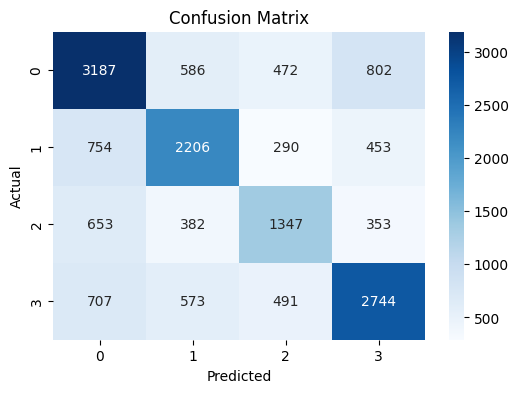

In [26]:
model_loaded = joblib.load('model.joblib')

X = df.drop(columns=['Preferred Destination Category'])  # Replace with actual target column
y = df['Preferred Destination Category']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = model_loaded.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nLoaded Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")    
plt.title("Confusion Matrix")
plt.show()